# Prep Notebook, Week 12/13 -- Altair stuffs

So, the last lecture we ended passing data through Python to Altair to output as vega-lite.  What is the benefit to using Python for data analysis?  Well, for some of us Python is our bestie and so we want to hang out with it the most.  For others, the benefit is that we can do data cleaning in Python and then put the cleaned data into our plots.

Let's work through a few examples:

1. With the buildings dataset
1. With the corgis dataset

In [2]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt # just in case

## 1. Altair with the buildings dataset

Ok!  So one dataset we know has some cleaning that needs to happen is the buildings dataset, so let's read this in and take a look to remember:

In [3]:
data_url = 'https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_bcubcg_fall2022/main/data/building_inventory.csv'
buildings = pd.read_csv(data_url)

In [4]:
buildings.head()

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,1975,1975,144,1,1,0,Unusual,Unusual,Not provided
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
2,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
3,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
4,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided


Let's make a quick plot with matplotlib to see what might need to be cleaned:

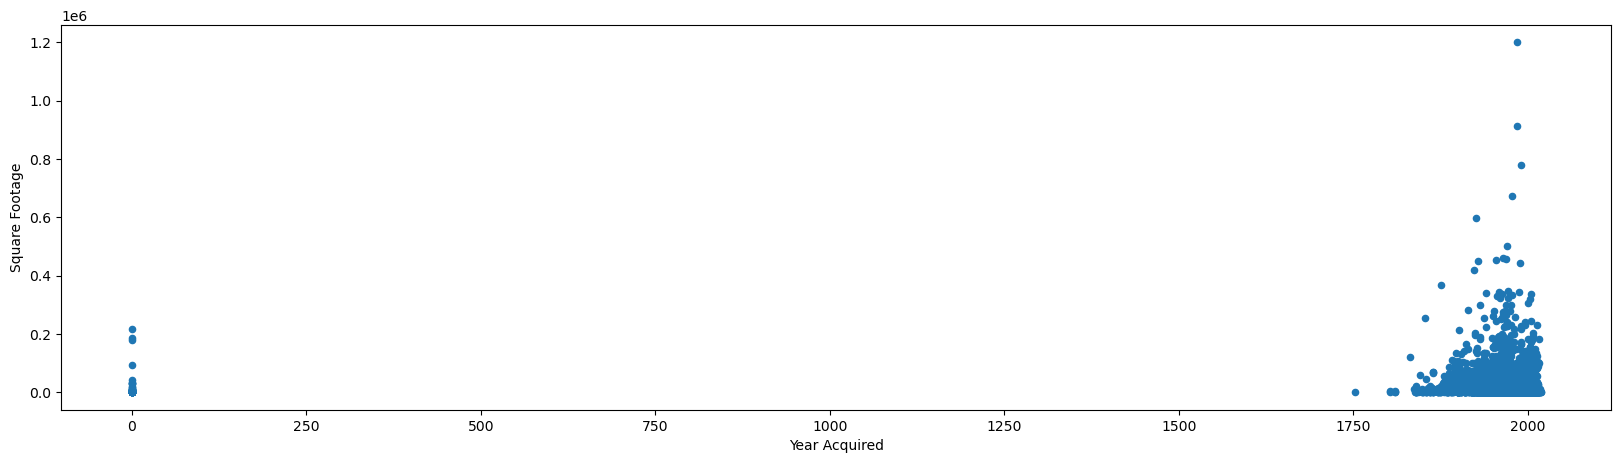

In [6]:
buildings.plot(x='Year Acquired', y='Square Footage', figsize=(20,5),kind='scatter')
plt.show()

So, if we remember to when we first saw this dataset, we had a bunch of zeros that we decided we should tag as missing data with an NaN.  Let's clean this dataframe:

In [8]:
buildings.loc[buildings['Year Acquired'] == 0,'Year Acquired'] = np.nan
buildings.loc[buildings['Square Footage'] == 0,'Square Footage'] = np.nan

And then re-make this plot:

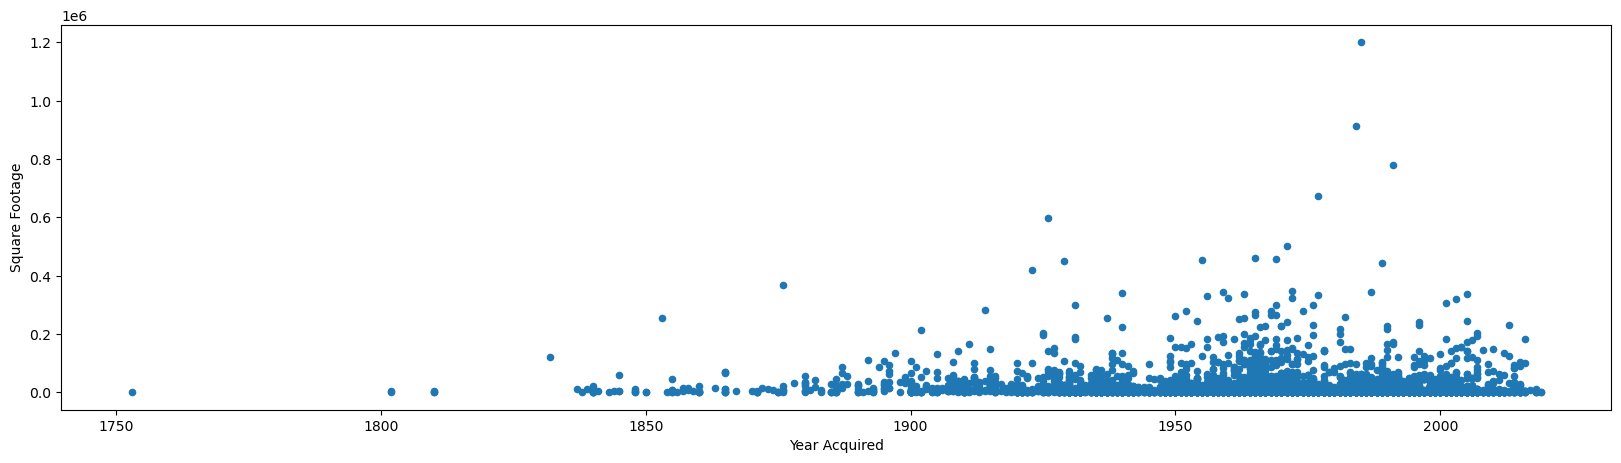

In [9]:
buildings.plot(x='Year Acquired', y='Square Footage', figsize=(20,5),kind='scatter')
plt.show()

Hey that looks much better!  Though, we probably want a log-scale on the y-axis, just to be safe:

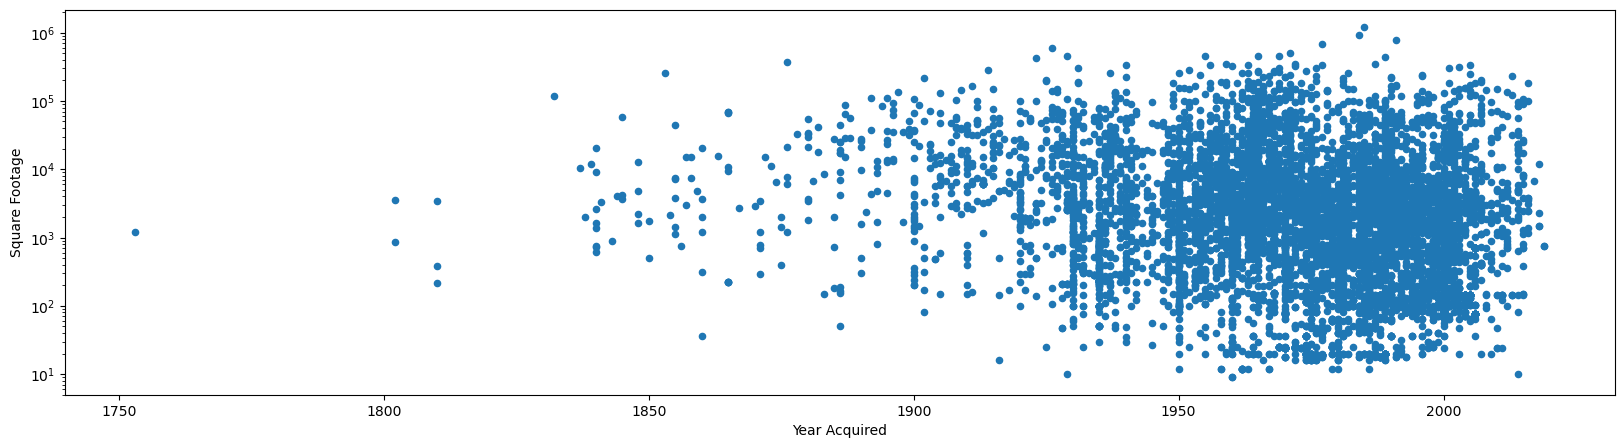

In [11]:
buildings.plot(x='Year Acquired', y='Square Footage', figsize=(20,5),kind='scatter',logy=True)
plt.show()

Nice.  

Ok, now that we have our data cleaned, we can further transform our data by creating a statistics dataframe out of our data:

In [12]:
stats = buildings.groupby("Year Acquired")["Square Footage"].describe()

In [13]:
stats

,count,mean,std,min,25%,50%,75%,max
Year Acquired,,,,,,,,
1753.0,1.0,1200.000000,NaN,1200.0,1200.0,1200.0,1200.00,1200.0
1802.0,2.0,2220.000000,1943.129435,846.0,1533.0,2220.0,2907.00,3594.0
1810.0,3.0,1344.333333,1809.945948,216.0,300.5,385.0,1908.50,3432.0
1832.0,1.0,120000.000000,NaN,120000.0,120000.0,120000.0,120000.00,120000.0
1837.0,1.0,10302.000000,NaN,10302.0,10302.0,10302.0,10302.00,10302.0
...,...,...,...,...,...,...,...,...
2015.0,20.0,15254.650000,29153.085290,144.0,696.0,3152.0,10590.25,105000.0
2016.0,10.0,30483.900000,61864.180491,1152.0,2464.0,3352.5,3793.00,184000.0
2017.0,1.0,6720.000000,NaN,6720.0,6720.0,6720.0,6720.00,6720.0


And make some plots with this transformed dataset:

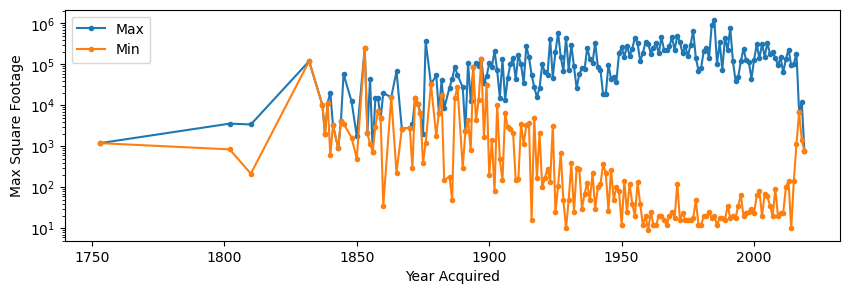

In [14]:
fig, ax = plt.subplots(figsize=(10,3)) # using matplotlib to make figure & axes objects
ax.plot(stats['max'],marker='.', label='Max') # plotting the 'max' column of stats
ax.plot(stats['min'],marker='.', label='Min') # plotting the 'min' column of stats
ax.set_xlabel("Year Acquired") # setting the x-label to be Year Acquired
ax.set_ylabel("Max Square Footage") # setting y-label to be Max Square Footage
ax.set_yscale('log')
ax.legend() # placing the labels in a legend that i added to the plots
plt.show()

So, this is a case were we not have a very different dataframe from were we started.  Its not that we necessarily *can't* make this kind of plot using the original dataframe with vega-lite, but if we are already doing analysis and transforms in Python with our data, we can then use Altair to export the results of this analysis to share with others.  So, let's get to it! First, let's re-make this plot with Altair:

In [19]:
# first, just one line
lines = alt.Chart(stats).mark_line().encode(
    alt.X("Year Acquired:O"),
    #alt.X('max:Q'),
    alt.Y("max:Q")
)
lines

alt.Chart(...)

https://altair-viz.github.io/user_guide/data.html#including-index-data

In [26]:
# first, just one line
lines = alt.Chart(stats.reset_index()).mark_line().encode(
    alt.X("Year Acquired:Q"),
    #alt.X('max:Q'),
    alt.Y("max:Q")
).properties(
    width=800
)
lines

alt.Chart(...)

In [27]:
# first, just one line
lines = alt.Chart(stats.reset_index()).mark_line().encode(
    alt.X("Year Acquired:O"),
    alt.Y("max:Q")
).properties(
    width=800
)
lines

alt.Chart(...)

In [28]:
# first, just one line
lines = alt.Chart(stats.reset_index()).mark_line().encode(
    alt.X("Year Acquired:T"),
    alt.Y("max:Q")
).properties(
    width=800
)
lines

alt.Chart(...)

In [31]:
stats.index = pd.to_datetime(stats.index.astype('int'), format='%Y')

In [32]:
stats

,count,mean,std,min,25%,50%,75%,max
Year Acquired,,,,,,,,
1753-01-01,1.0,1200.000000,NaN,1200.0,1200.0,1200.0,1200.00,1200.0
1802-01-01,2.0,2220.000000,1943.129435,846.0,1533.0,2220.0,2907.00,3594.0
1810-01-01,3.0,1344.333333,1809.945948,216.0,300.5,385.0,1908.50,3432.0
1832-01-01,1.0,120000.000000,NaN,120000.0,120000.0,120000.0,120000.00,120000.0
1837-01-01,1.0,10302.000000,NaN,10302.0,10302.0,10302.0,10302.00,10302.0
...,...,...,...,...,...,...,...,...
2015-01-01,20.0,15254.650000,29153.085290,144.0,696.0,3152.0,10590.25,105000.0
2016-01-01,10.0,30483.900000,61864.180491,1152.0,2464.0,3352.5,3793.00,184000.0
2017-01-01,1.0,6720.000000,NaN,6720.0,6720.0,6720.0,6720.00,6720.0


In [33]:
# first, just one line
lines = alt.Chart(stats.reset_index()).mark_line().encode(
    alt.X("Year Acquired:T"),
    alt.Y("max:Q")
).properties(
    width=800
)
lines

alt.Chart(...)

Now, let's add in the min line, to do that we need to make a layered plot:

In [ ]:
#https://github.com/altair-viz/altair/issues/968
# base = alt.Chart(df.reset_index()).encode(x='x')

# alt.layer(
#     base.mark_line(color='blue').encode(y='squared'),
#     base.mark_line(color='red').encode(y='cubed')
# )

In [50]:
#https://github.com/altair-viz/altair/issues/968
lines = alt.Chart(stats.reset_index()).encode(
    alt.X('Year Acquired:T')
).properties(
    width=800
)

lines = alt.layer(
    lines.mark_line(color='blue').encode(y='max:Q'),
    lines.mark_line(color='red').encode(y='min:Q')
)
lines

alt.LayerChart(...)

Let's set a log scale for each of these:

In [52]:
lines = alt.Chart(stats.reset_index()).encode(
    alt.X('Year Acquired:T')
).properties(
    width=800
)

lines = alt.layer(
    lines.mark_line(color='blue').encode(
        alt.Y('max:Q',scale=alt.Scale(type='log'))
             ),
    lines.mark_line(color='red').encode(
        alt.Y('min:Q',scale=alt.Scale(type='log'))
    )
)
lines

alt.LayerChart(...)

Neat!  Let's save this plot:

In [53]:
myJekyllDir = '/Users/jnaiman/online_cv_fall2022/'

In [55]:
lines.properties(width='container').save(myJekyllDir+"assets/json/buildings_sqft.json") 
# non-faceted chart, so can save with responsive size

Before moving on, we can make this ["easily" interactive with simple pans/zooms](https://altair-viz.github.io/altair-tutorial/notebooks/06-Selections.html):

In [56]:
lines = alt.Chart(stats.reset_index()).encode(
    alt.X('Year Acquired:T')
).properties(
    width=800
)

lines = alt.layer(
    lines.mark_line(color='blue').encode(
        alt.Y('max:Q',scale=alt.Scale(type='log'))
             ),
    lines.mark_line(color='red').encode(
        alt.Y('min:Q',scale=alt.Scale(type='log'))
    )
).interactive()
lines

alt.LayerChart(...)

Let's re-save this again:

In [57]:
lines.properties(width='container').save(myJekyllDir+"assets/json/buildings_sqft.json") 

### A few extra things we may/maynot get to

#### 1. Adding a mouse over for both lines

Porting from: https://altair-viz.github.io/gallery/multiline_tooltip.html#multi-line-tooltip

In [61]:
stats_min = stats[['min','max']]
stats_min.head()

,min,max
Year Acquired,,
1753-01-01,1200.0,1200.0
1802-01-01,846.0,3594.0
1810-01-01,216.0,3432.0
1832-01-01,120000.0,120000.0
1837-01-01,10302.0,10302.0


In [82]:
# easier for multi-line plots
source = stats_min.reset_index().melt('Year Acquired', 
                                      var_name='Statistic', value_name='stat')
source.head()

,Year Acquired,Statistic,stat
0,1753-01-01,min,1200.0
1,1802-01-01,min,846.0
2,1810-01-01,min,216.0
3,1832-01-01,min,120000.0
4,1837-01-01,min,10302.0


In [83]:
# The basic line
line = alt.Chart(source).mark_line(interpolate='basis').encode(
    alt.Y('stat:Q',scale=alt.Scale(type='log')),
    x='Year Acquired:T',
    color='Statistic:N'
)
line

alt.Chart(...)

In [91]:
# Create a selection that chooses the nearest point & selects based on x-value
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['Year Acquired'], empty='none')
# nearest = alt.selection(type='single', nearest=True, on='mouseover',
#                         encodings=['x'], empty='none')

# The basic line
#line = alt.Chart(source).mark_line(interpolate='basis').encode(
# given that we want to be accurate to the data, we probably don't want to interpolate
line = alt.Chart(source).mark_line().encode(
    alt.Y('stat:Q',scale=alt.Scale(type='log')),
    x='Year Acquired:T',
    color='Statistic:N'
)

# Transparent selectors across the chart. This is what tells us
# the x-value of the cursor
selectors = alt.Chart(source).mark_point().encode(
    x='Year Acquired:T',
    opacity=alt.value(0),
).add_selection(
    nearest
)

# Draw points on the line, and highlight based on selection
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw text labels near the points, and highlight based on selection
text = line.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest, 'stat:Q', alt.value(' '))
)

# Draw a rule at the location of the selection
rules = alt.Chart(source).mark_rule(color='gray').encode(
    x='Year Acquired:T',
).transform_filter(
    nearest
)

# Put the five layers into a chart and bind the data
alt.layer(
    line, selectors, points, rules, text
).properties(
    width=600, height=300
)

alt.LayerChart(...)

#### 2. Deciding what statistic to plot

Porting from: https://altair-viz.github.io/user_guide/interactions.html#binding-adding-data-driven-inputs

In [92]:
source2 = stats.reset_index().melt('Year Acquired', 
                                      var_name='Statistic', value_name='stat')


In [93]:
source2.head()

,Year Acquired,Statistic,stat
0,1753-01-01,count,1.0
1,1802-01-01,count,2.0
2,1810-01-01,count,3.0
3,1832-01-01,count,1.0
4,1837-01-01,count,1.0


In [98]:
line = alt.Chart(source2).mark_line().encode(
    alt.Y('stat:Q',scale=alt.Scale(type='log')),
    x='Year Acquired:T',
    color='Statistic:N'
)
line

alt.Chart(...)

We see the above has some issues -- could be due to our scale choice, let's try w/o the log scale:

In [107]:
line = alt.Chart(source2).mark_line().encode(
    alt.Y('stat:Q'),#,scale=alt.Scale(type='log')),
    x='Year Acquired:T',
    color='Statistic:N'
)
line

alt.Chart(...)

So, we probably have some zeros to attend to:

In [102]:
source2['stat'].min()

0.0

In [103]:
source2.loc[source2['stat'] == 0,'stat'] = np.nan

In [104]:
line = alt.Chart(source2).mark_line().encode(
    alt.Y('stat:Q',scale=alt.Scale(type='log')),
    x='Year Acquired:T',
    color='Statistic:N'
)
line

alt.Chart(...)

In [106]:
input_dropdown = alt.binding_select(options=['50%','mean','min','max','std'], 
                                    name='Statistic')
selection = alt.selection_single(fields=['Statistic'], bind=input_dropdown)
color = alt.condition(selection,
                    alt.Color('Statistic:N', legend=None),
                    alt.value('lightgray'))

line = alt.Chart(source2).mark_line().encode(
    alt.Y('stat:Q',scale=alt.Scale(type='log')),
    x='Year Acquired:T',
    color=color
).add_selection(
    selection
)
line

alt.Chart(...)

A little hard to see some of those lines when they are "behind" others -- we can also mess with our opacity as well:

In [109]:
input_dropdown = alt.binding_select(options=['50%','mean','min','max','std'], 
                                    name='Statistic')
selection = alt.selection_single(fields=['Statistic'], bind=input_dropdown)
color = alt.condition(selection,
                    alt.Color('Statistic:N', legend=None),
                    alt.value('lightgray'))
opacity = alt.condition(selection, alt.value(1.0), alt.value(0.25))

line = alt.Chart(source2).mark_line().encode(
    alt.Y('stat:Q',scale=alt.Scale(type='log')),
    x='Year Acquired:T',
    color=color,
    opacity=opacity
).add_selection(
    selection
)
line

alt.Chart(...)

If we like this, we can save it as well:

In [110]:
line.properties(width='container').save(myJekyllDir+"assets/json/buildings_sqft_stats.json") 

## 2. Corgis Dataset examples

Let's start by reading in this dataset and taking a look -- we'll start with the number of corgis born over time:

In [128]:
corgs = pd.read_csv('https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_bcubcg_fall2022/main/data/corgs_per_country_over_time_columns_2020.csv')

In [129]:
corgs.head()

,Years,United States,Brazil,Russia,Japan,Vietnam,Germany,France,United Kingdom,Italy,...,Croatia,New Zealand,Ireland,Lithuania,Uruguay,Latvia,Slovenia,Estonia,Netherlands Antilles,Kosovo
0,1917,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1918,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1919,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1920,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1921,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


So, this shows the number of corgis born over time in different countries.  The easiest plot we can think of is probably a line chart of each country over time.  First, let's start with the United States:

In [130]:
linecorg = alt.Chart(corgs).mark_line().encode(
    alt.X('Years:Q'),
    alt.Y('United States:Q')
)
linecorg

alt.Chart(...)

Here again, we probably want to specify that we have time units:

In [131]:
corgs['Years'] = pd.to_datetime(corgs['Years'].astype('int'), format='%Y')

In [132]:
corgs

,Years,United States,Brazil,Russia,Japan,Vietnam,Germany,France,United Kingdom,Italy,...,Croatia,New Zealand,Ireland,Lithuania,Uruguay,Latvia,Slovenia,Estonia,Netherlands Antilles,Kosovo
0,1917-01-01,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1918-01-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1919-01-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1920-01-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1921-01-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,2016-01-01,229,0,217,2,0,54,55,28,2,...,8,3,0,9,0,0,0,27,17,72
100,2017-01-01,213,0,260,2,1,28,60,10,4,...,4,3,0,0,2,0,0,8,25,101
101,2018-01-01,198,0,329,0,3,42,25,5,2,...,6,3,0,0,0,0,0,16,12,56
102,2019-01-01,118,0,189,0,0,30,62,1,2,...,0,0,0,0,0,0,0,16,12,51


In [133]:
linecorg = alt.Chart(corgs).mark_line().encode(
    alt.X('Years:T'),
    alt.Y('United States:Q')
)
linecorg

alt.Chart(...)

That looks better!  To make multiple lines for each country, we want to probably use the `melt` operation we did before. To do that, we need to make years the index:

In [134]:
corgs = corgs.set_index('Years')
corgs.head()

,United States,Brazil,Russia,Japan,Vietnam,Germany,France,United Kingdom,Italy,South Africa,...,Croatia,New Zealand,Ireland,Lithuania,Uruguay,Latvia,Slovenia,Estonia,Netherlands Antilles,Kosovo
Years,,,,,,,,,,,,,,,,,,,,,
1917-01-01,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1918-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1919-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1920-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1921-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now we can "melt" like before:

In [137]:
corg_source = corgs.reset_index().melt('Years', 
                                      var_name='Country', value_name='country')

In [139]:
corg_source.head()

,Years,Country,country
0,1917-01-01,United States,0
1,1918-01-01,United States,0
2,1919-01-01,United States,0
3,1920-01-01,United States,0
4,1921-01-01,United States,0


Now, let's try again with our multi-line plot:

In [140]:
linecorg = alt.Chart(corg_source).mark_line().encode(
    alt.Y('country:Q'),
    x='Years:T',
    color='Country:N'
)
linecorg

alt.Chart(...)

Since there is a large range of corgis born, we might try a log-scale on the y-axis:

In [145]:
linecorg = alt.Chart(corg_source).mark_line().encode(
    alt.Y('country:Q',scale=alt.Scale(type='log')),
    x='Years:T',
    color='Country:N'
)
linecorg

alt.Chart(...)

Here we see that there is an issue -- this is probably because there are zeros in our dataset:

In [143]:
corg_source['country'].min()

0

Potentially, we can "clean" these by setting any zeros to NaN's, however in this case those 0's are meaningful -- they are telling us that a particular country has no corgis born in that year!  Instead, we have a few different options.  One thing we can do [is apply a](https://stackoverflow.com/questions/58032074/why-is-altair-returning-an-empty-chart-when-using-log-scale) [filter opperation](https://altair-viz.github.io/user_guide/transform/filter.html#filter-transform) on our data:

In [146]:
linecorg = alt.Chart(corg_source).transform_filter(
    alt.datum.country > 0
).mark_line().encode(
    alt.Y('country:Q',scale=alt.Scale(type='log')),
    x='Years:T',
    color='Country:N'
)
linecorg

alt.Chart(...)

This doesn't really get to our issue though -- we are just filtering out those zero years/countries.  In this case, instead of filtering, we probably want to use a symmetric log instead of a log for our scale;

In [147]:
linecorg = alt.Chart(corg_source).mark_line().encode(
    alt.Y('country:Q',scale=alt.Scale(type='symlog')),
    x='Years:T',
    color='Country:N'
)
linecorg

alt.Chart(...)

Even with this though, we have sort of a messy plot -- even if we allowed for selections (like with the buildings dataset above) we still have many lines that "fall off" our legend which is not helpful.

Since this is data in different countries, we could think that maybe a good idea would be some kind of map!

First, let's see what mappable data "comes with" vega-datasets:

In [149]:
from vega_datasets import data

In [152]:
#data.countries

In [151]:
data.world_110m

Let's try plotting both of these:

In [157]:
geo = alt.topo_feature(data.world_110m.url, feature='countries')

# US states background
world = alt.Chart(geo).mark_geoshape(
    fill='gray',
    stroke='white'
).properties(
    width=800,
    height=500
).project('equirectangular') # note we have a few projections we can use!
world

alt.Chart(...)

So, one way we can plot data on this plot is to plot dots over each of the countries showing how many corgis have been born in each one.  For this though [we probably need the latitude and longitude points](https://altair-viz.github.io/altair-tutorial/notebooks/09-Geographic-plots.html).

One way to do this is [using the OpenStreetMap project](https://gis.stackexchange.com/questions/212796/getting-latlon-extent-of-country-by-its-name-using-python):

In [164]:
import requests
def get_boundingbox_country(country, output_as='center'):
    """
    get the bounding box of a country in EPSG4326 given a country name

    Parameters
    ----------
    country : str
        name of the country in english and lowercase
    output_as : 'str
        chose from 'boundingbox' or 'center'. 
         - 'boundingbox' for [latmin, latmax, lonmin, lonmax]
         - 'center' for [latcenter, loncenter]

    Returns
    -------
    output : list
        list with coordinates as str
    """
    # create url
    url = '{0}{1}{2}'.format('http://nominatim.openstreetmap.org/search?country=',
                             country,
                             '&format=json&polygon=0')
    response = requests.get(url).json()[0]

    # parse response to list
    if output_as == 'boundingbox':
        lst = response[output_as]
        output = [float(i) for i in lst]
    if output_as == 'center':
        lst = [response.get(key) for key in ['lat','lon']]
        output = [float(i) for i in lst]
    return output

We can call OpenStreetMaps in a few different ways, with country codes or names:

In [167]:
lat,long = get_boundingbox_country('usa')
lat,long

In [169]:
lat,long = get_boundingbox_country('us')
lat,long

(39.7837304, -100.445882)

In [171]:
lat,long = get_boundingbox_country('United States')
lat,long

(39.7837304, -100.445882)

There is no guarantee that the dataset is formatted with the correct country codes -- so we'd best check and see:

In [189]:
corgs.columns

Index(['United States', 'Brazil', 'Russia', 'Japan', 'Vietnam', 'Germany',
       'France', 'United Kingdom', 'Italy', 'South Africa', 'Ukraine', 'Spain',
       'Poland', 'Canada', 'Korea, North', 'Romania', 'Australia', 'Portugal',
       'Belgium', 'Czech Republic', 'Hungary', 'Belarus', 'Sweden', 'Austria',
       'Switzerland', 'Israel', 'Serbia', 'Denmark', 'Finland', 'Norway',
       'Croatia', 'New Zealand', 'Ireland', 'Lithuania', 'Uruguay', 'Latvia',
       'Slovenia', 'Estonia', 'Netherlands Antilles', 'Kosovo'],
      dtype='object')

In [190]:
lat,long = [],[]
for c in corgs.columns:
    la,lo = get_boundingbox_country(str(c))
    print(c,la,lo)
    lat.append(la); long.append(lo)

United States 39.7837304 -100.445882
Brazil -10.3333333 -53.2
Russia 64.6863136 97.7453061
Japan 36.5748441 139.2394179
Vietnam 15.9266657 107.9650855
Germany 51.1638175 10.4478313
France 46.603354 1.8883335
United Kingdom 54.7023545 -3.2765753
Italy 42.6384261 12.674297
South Africa -28.8166236 24.991639
Ukraine 49.4871968 31.2718321
Spain 39.3260685 -4.8379791
Poland 52.215933 19.134422
Canada 61.0666922 -107.991707


IndexError: list index out of range

Ah ha!  We have an issue, let's see what it is:

In [191]:
c

'Korea, North'

In this case, we need to do some data cleaning.  We can start from our "source" but instead, we probably want to start from the original dataframe, just to be consistent:

In [192]:
corg_clean = corgs.copy()
#corg_clean = corg_clean.set_index('Years') # note -- don't have to do this again since we started with a rest index
corg_clean = corg_clean.rename(columns={'Korea, North':"North Korea"})
corg_clean.head()

,United States,Brazil,Russia,Japan,Vietnam,Germany,France,United Kingdom,Italy,South Africa,...,Croatia,New Zealand,Ireland,Lithuania,Uruguay,Latvia,Slovenia,Estonia,Netherlands Antilles,Kosovo
Years,,,,,,,,,,,,,,,,,,,,,
1917-01-01,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1918-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1919-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1920-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1921-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Let's try this again:

In [193]:
lat,long = [],[]
for c in corg_clean.columns:
    la,lo = get_boundingbox_country(str(c))
    print(c,la,lo)
    lat.append(la); long.append(lo)

United States 39.7837304 -100.445882
Brazil -10.3333333 -53.2
Russia 64.6863136 97.7453061
Japan 36.5748441 139.2394179
Vietnam 15.9266657 107.9650855
Germany 51.1638175 10.4478313
France 46.603354 1.8883335
United Kingdom 54.7023545 -3.2765753
Italy 42.6384261 12.674297
South Africa -28.8166236 24.991639
Ukraine 49.4871968 31.2718321
Spain 39.3260685 -4.8379791
Poland 52.215933 19.134422
Canada 61.0666922 -107.991707
North Korea 40.3736611 127.0870417
Romania 45.9852129 24.6859225
Australia -24.7761086 134.755
Portugal 39.6621648 -8.1353519
Belgium 50.6402809 4.6667145
Czech Republic 49.7439047 15.3381061
Hungary 47.1817585 19.5060937
Belarus 53.4250605 27.6971358
Sweden 59.6749712 14.5208584
Austria 47.59397 14.12456
Switzerland 46.7985624 8.2319736
Israel 30.8124247 34.8594762
Serbia 44.1534121 20.55144
Denmark 55.670249 10.3333283
Finland 63.2467777 25.9209164
Norway 60.5000209 9.0999715
Croatia 45.5643442 17.0118954
New Zealand -41.5000831 172.8344077
Ireland 52.865196 -7.9794599


IndexError: list index out of range

In [194]:
c

'Netherlands Antilles'

Found another one:

In [195]:
corg_clean = corgs.copy()
corg_clean = corg_clean.rename(columns={'Korea, North':"North Korea",'Netherlands Antilles':"Netherlands"})

In [196]:
lat,long = [],[]
for c in corg_clean.columns:
    la,lo = get_boundingbox_country(str(c))
    print(c,la,lo)
    lat.append(la); long.append(lo)

United States 39.7837304 -100.445882
Brazil -10.3333333 -53.2
Russia 64.6863136 97.7453061
Japan 36.5748441 139.2394179
Vietnam 15.9266657 107.9650855
Germany 51.1638175 10.4478313
France 46.603354 1.8883335
United Kingdom 54.7023545 -3.2765753
Italy 42.6384261 12.674297
South Africa -28.8166236 24.991639
Ukraine 49.4871968 31.2718321
Spain 39.3260685 -4.8379791
Poland 52.215933 19.134422
Canada 61.0666922 -107.991707
North Korea 40.3736611 127.0870417
Romania 45.9852129 24.6859225
Australia -24.7761086 134.755
Portugal 39.6621648 -8.1353519
Belgium 50.6402809 4.6667145
Czech Republic 49.7439047 15.3381061
Hungary 47.1817585 19.5060937
Belarus 53.4250605 27.6971358
Sweden 59.6749712 14.5208584
Austria 47.59397 14.12456
Switzerland 46.7985624 8.2319736
Israel 30.8124247 34.8594762
Serbia 44.1534121 20.55144
Denmark 55.670249 10.3333283
Finland 63.2467777 25.9209164
Norway 60.5000209 9.0999715
Croatia 45.5643442 17.0118954
New Zealand -41.5000831 172.8344077
Ireland 52.865196 -7.9794599


Hurray!  So, this is a case where being able to clean the data in Python was super useful.  Let's try adding these as points to our map now that we have cleaned data.

One other data transformation we probably want to do is transpose this matrix so that we have countries as rows and corgis born per year as columns:

In [201]:
corg_clean_t = corg_clean.T
corg_clean_t.head()

Years,1917-01-01,1918-01-01,1919-01-01,1920-01-01,1921-01-01,1922-01-01,1923-01-01,1924-01-01,1925-01-01,1926-01-01,...,2011-01-01,2012-01-01,2013-01-01,2014-01-01,2015-01-01,2016-01-01,2017-01-01,2018-01-01,2019-01-01,2020-01-01
United States,0,0,0,0,0,0,0,0,0,0,...,408,431,376,280,301,229,213,198,118,2
Brazil,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Russia,0,0,0,0,0,0,0,0,0,0,...,89,82,115,127,237,217,260,329,189,16
Japan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,2,0,0,0
Vietnam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,3,0,0


Since, technically, the index is no longer years, so we should be sure to name the index more intuatively: 

In [206]:
corg_clean_t.index.name = "Country"

In [207]:
corg_clean_t.head()

Years,1917-01-01,1918-01-01,1919-01-01,1920-01-01,1921-01-01,1922-01-01,1923-01-01,1924-01-01,1925-01-01,1926-01-01,...,2011-01-01,2012-01-01,2013-01-01,2014-01-01,2015-01-01,2016-01-01,2017-01-01,2018-01-01,2019-01-01,2020-01-01
Country,,,,,,,,,,,,,,,,,,,,,
United States,0,0,0,0,0,0,0,0,0,0,...,408,431,376,280,301,229,213,198,118,2
Brazil,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Russia,0,0,0,0,0,0,0,0,0,0,...,89,82,115,127,237,217,260,329,189,16
Japan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,2,0,0,0
Vietnam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,3,0,0


Now we can add in the lat/long for each country:

In [208]:
corg_clean_t['Latitude'] = lat
corg_clean_t['Longitude'] = long

In [209]:
corg_clean_t.head()

Years,1917-01-01 00:00:00,1918-01-01 00:00:00,1919-01-01 00:00:00,1920-01-01 00:00:00,1921-01-01 00:00:00,1922-01-01 00:00:00,1923-01-01 00:00:00,1924-01-01 00:00:00,1925-01-01 00:00:00,1926-01-01 00:00:00,...,2013-01-01 00:00:00,2014-01-01 00:00:00,2015-01-01 00:00:00,2016-01-01 00:00:00,2017-01-01 00:00:00,2018-01-01 00:00:00,2019-01-01 00:00:00,2020-01-01 00:00:00,Latitude,Longitude
Country,,,,,,,,,,,,,,,,,,,,,
United States,0,0,0,0,0,0,0,0,0,0,...,376,280,301,229,213,198,118,2,39.783730,-100.445882
Brazil,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-10.333333,-53.200000
Russia,0,0,0,0,0,0,0,0,0,0,...,115,127,237,217,260,329,189,16,64.686314,97.745306
Japan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,2,0,0,0,36.574844,139.239418
Vietnam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,3,0,0,15.926666,107.965086


Now (finally) we can plot those points on our map using just the lat/long:

In [220]:
corg_subset = corg_clean_t.reset_index()[['Country','Latitude','Longitude']]
corg_subset.head()

Years,Country,Latitude,Longitude
0,United States,39.783730,-100.445882
1,Brazil,-10.333333,-53.200000
2,Russia,64.686314,97.745306
3,Japan,36.574844,139.239418
4,Vietnam,15.926666,107.965086


In [224]:
geo = alt.topo_feature(data.world_110m.url, feature='countries')

# US states background
world = alt.Chart(geo).mark_geoshape(
    fill='gray',
    stroke='white'
).properties(
    width=800,
    height=500
).project('equirectangular') # note we have a few projections we can use!

points = alt.Chart(corg_subset).mark_circle().encode(
    longitude='Longitude:Q',
    latitude='Latitude:Q',
    size=alt.value(100),
    tooltip='Country'
)

world + points

alt.LayerChart(...)

We probably want the size of the dot to be proportional to the actual number of corgis born.

To start, let's just plot the total corgis born in a country:

In [216]:
corg_clean_t.loc[:, (corg_clean_t.columns != 'Longitude') & (corg_clean_t.columns != "Latitude")].head()

Years,1917-01-01,1918-01-01,1919-01-01,1920-01-01,1921-01-01,1922-01-01,1923-01-01,1924-01-01,1925-01-01,1926-01-01,...,2011-01-01,2012-01-01,2013-01-01,2014-01-01,2015-01-01,2016-01-01,2017-01-01,2018-01-01,2019-01-01,2020-01-01
Country,,,,,,,,,,,,,,,,,,,,,
United States,0,0,0,0,0,0,0,0,0,0,...,408,431,376,280,301,229,213,198,118,2
Brazil,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Russia,0,0,0,0,0,0,0,0,0,0,...,89,82,115,127,237,217,260,329,189,16
Japan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,2,0,0,0
Vietnam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,3,0,0


Now we can sum along the Country axis:

In [214]:
corg_clean_t.loc[:, (corg_clean_t.columns != 'Longitude') & (corg_clean_t.columns != "Latitude")].sum(axis=1)

Country
United States     16130
Brazil                1
Russia             1834
Japan                 7
Vietnam               4
Germany             892
France              597
United Kingdom     2649
Italy               106
South Africa         28
Ukraine              19
Spain                 5
Poland              859
Canada              391
North Korea           5
Romania               7
Australia           891
Portugal              7
Belgium             110
Czech Republic      271
Hungary               8
Belarus              38
Sweden             2008
Austria              29
Switzerland          30
Israel               32
Serbia                2
Denmark            2176
Finland            4051
Norway             1077
Croatia              21
New Zealand        1097
Ireland              29
Lithuania            29
Uruguay               2
Latvia                3
Slovenia              1
Estonia              97
Netherlands         536
Kosovo              649
dtype: int64

In [217]:
corg_clean_t['Total Corg'] = corg_clean_t.loc[:, (corg_clean_t.columns != 'Longitude') & (corg_clean_t.columns != "Latitude")].sum(axis=1).values

In [218]:
corg_clean_t.head()

Years,1917-01-01 00:00:00,1918-01-01 00:00:00,1919-01-01 00:00:00,1920-01-01 00:00:00,1921-01-01 00:00:00,1922-01-01 00:00:00,1923-01-01 00:00:00,1924-01-01 00:00:00,1925-01-01 00:00:00,1926-01-01 00:00:00,...,2014-01-01 00:00:00,2015-01-01 00:00:00,2016-01-01 00:00:00,2017-01-01 00:00:00,2018-01-01 00:00:00,2019-01-01 00:00:00,2020-01-01 00:00:00,Latitude,Longitude,Total Corg
Country,,,,,,,,,,,,,,,,,,,,,
United States,0,0,0,0,0,0,0,0,0,0,...,280,301,229,213,198,118,2,39.783730,-100.445882,16130
Brazil,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-10.333333,-53.200000,1
Russia,0,0,0,0,0,0,0,0,0,0,...,127,237,217,260,329,189,16,64.686314,97.745306,1834
Japan,0,0,0,0,0,0,0,0,0,0,...,0,0,2,2,0,0,0,36.574844,139.239418,7
Vietnam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,3,0,0,15.926666,107.965086,4


Let's again subset our data:

In [225]:
corg_subset2 = corg_clean_t.reset_index()[['Country','Latitude','Longitude','Total Corg']]

In [235]:
geo = alt.topo_feature(data.world_110m.url, feature='countries')

# US states background
world = alt.Chart(geo).mark_geoshape(
    fill='gray',
    stroke='white'
).properties(
    width=800,
    height=500
).project('equirectangular') # note we have a few projections we can use!

points = alt.Chart(corg_subset2).mark_circle().encode(
    longitude='Longitude:Q',
    latitude='Latitude:Q',
    size=alt.Size('Total Corg:Q'),
    tooltip='Country',
)

world + points

alt.LayerChart(...)

By default, we see that there is some scale applied to the points where there are some that are very small.  Let's see if we can mess with this:

In [236]:
geo = alt.topo_feature(data.world_110m.url, feature='countries')

# US states background
world = alt.Chart(geo).mark_geoshape(
    fill='gray',
    stroke='white'
).properties(
    width=800,
    height=500
).project('equirectangular') # note we have a few projections we can use!

points = alt.Chart(corg_subset2).mark_circle().encode(
    longitude='Longitude:Q',
    latitude='Latitude:Q',
    size=alt.Size('Total Corg:Q',scale=None),
    tooltip='Country',
)

world + points

alt.LayerChart(...)

Whoa!  Now that seems to have gone the other way!  Now we have so many overlapping points that its hard to see in "high corgi" areas like the UK.  Let's try a log scale:

In [237]:
geo = alt.topo_feature(data.world_110m.url, feature='countries')

# US states background
world = alt.Chart(geo).mark_geoshape(
    fill='gray',
    stroke='white'
).properties(
    width=800,
    height=500
).project('equirectangular') # note we have a few projections we can use!

points = alt.Chart(corg_subset2).mark_circle().encode(
    longitude='Longitude:Q',
    latitude='Latitude:Q',
    size=alt.Size('Total Corg:Q',scale=alt.Scale(type='log')),
    tooltip='Country',
)

world + points

alt.LayerChart(...)

Hey that looks better!  Though, that blue is a bit hard to see, let's try messing with the colors:

In [238]:
geo = alt.topo_feature(data.world_110m.url, feature='countries')

# US states background
world = alt.Chart(geo).mark_geoshape(
    fill='lightgray',
    stroke='white'
).properties(
    width=800,
    height=500
).project('equirectangular') # note we have a few projections we can use!

points = alt.Chart(corg_subset2).mark_circle().encode(
    longitude='Longitude:Q',
    latitude='Latitude:Q',
    size=alt.Size('Total Corg:Q',scale=alt.Scale(type='log')),
    tooltip='Country',
)

world + points

alt.LayerChart(...)

## Optional:

Maybe try saving with HTML just as an example? https://altair-viz.github.io/user_guide/saving_charts.html